In [1]:
import numpy as np
import random
from tqdm.notebook import tqdm
import time
import sys
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Make some points
grid=[[3,0,0,0,0,0,0,0,0,3]
                ,[0,0,0,0,0,0,2,1,1,0]
                ,[0,0,0,0,0,0,1,1,1,0]
                ,[0,0,0,0,0,0,1,1,1,0]
                ,[0,0,0,0,0,0,0,0,0,0]
                ,[0,0,1,1,1,1,1,0,0,0]
                ,[0,0,1,1,1,1,1,0,0,0]
                ,[0,0,1,1,1,2,2,2,0,0]
                ,[0,0,1,1,1,2,2,2,0,0]
                ,[3,0,1,1,1,2,2,2,0,3]]

# Make the plot
plt.hist2d(grid)
plt.colorbar()
plt.show()

In [2]:
class OilF:
  def __init__(self):
      self.grid=[[3,0,0,0,0,0,0,0,0,3]
                ,[0,0,0,0,0,0,2,1,1,0]
                ,[0,0,0,0,0,0,1,1,1,0]
                ,[0,0,0,0,0,0,1,1,1,0]
                ,[0,0,0,0,0,0,0,0,0,0]
                ,[0,0,1,1,1,1,1,0,0,0]
                ,[0,0,1,1,1,1,1,0,0,0]
                ,[0,0,1,1,1,2,2,2,0,0]
                ,[0,0,1,1,1,2,2,2,0,0]
                ,[3,0,1,1,1,2,2,2,0,3]]
      self.oilF={(2,7):[2,8],(7,4):[3,16]}
      self.obs={(1,6):1,(8,6):2}
      self.actions=[1,2,3,4,5,6]
      self.states={}
      self.numStates={}
      self.robotXs=0 #random.randint(0,9)  
      self.robotYs=0 #random.randint(0,9) 
      self.robotLoad=0
      self.reward=0
      self.done=False
      self.dilv={(0,0),(0,9),(9,0),(9,9)}
      self.count=[0,0,0,0,0,0]

      x=0
      self.maxload=3
      self.rangX=10
      self.rangY=10
      self.oilF1C=3
      self.oilF2C=4
      for robotL in range(self.maxload):
        for robotX in range(self.rangX):
          for robotY in range(self.rangY):
            for oilF1 in range(self.oilF1C):
              for oilF2 in range(self.oilF2C):
                self.states[x]=robotL,robotX,robotY,oilF1,oilF2
                self.numStates[(robotL,robotX,robotY,oilF1,oilF2)]=x
                x+=1

    

  def reset(self):
    self.__init__()
    return 0

  def actionSpaceSample(self):
    return random.randint(0,5)   

  def step(self,action):
    self.reward=0
    if action ==0:
      self.count[0]+=1
      self.reward-=2
      if self.robotYs!=0:
        self.robotYs-=1
    elif action == 1:
      self.count[1]+=1
      self.reward-=2
      if self.robotYs!=9:
        self.robotYs+=1 
    elif action == 2:
      self.count[2]+=1
      self.reward-=2
      if self.robotXs!=0:
        self.robotXs-=1
    elif action == 3:
      self.count[3]+=1
      self.reward-=2
      if self.robotXs!=9:
        self.robotXs+=1
    elif action == 4:
      self.count[4]+=1
      flage=True
      for o in self.obs:
        if abs(self.robotXs-o[0])<self.obs[o] and abs(self.robotYs-o[1])<self.obs[o]:
          self.reward-=5
          flage=False
      if  flage:
        for f in self.oilF:
          if abs(self.robotXs-f[0])<self.oilF[f][0] and abs(self.robotYs-f[1])<self.oilF[f][0]:
              if self.robotLoad < self.maxload-1:
                self.reward+=5
                self.robotLoad+=1
                if self.oilF[f][0]!=0:
                  self.oilF[f][1]-=1
                if self.oilF[f][1]<=0:
                  if self.oilF[f][0]==1:
                    self.oilF[f][0]=0
                    self.oilF[f][1]=0
                  elif self.oilF[f][0]==2:
                    self.oilF[f][0]=1
                    self.oilF[f][1]=0
                  else:
                    self.oilF[f][0]-=1
                    self.oilF[f][1]=(self.oilF[f][0]-1)*8
              else:
                self.reward-=1
          else:
            self.reward-=3  
          if self.oilF[(2,7)][0]==0 and self.oilF[(7,4)][0]==0:
            self.done=True
            break
    elif action == 5:
      self.count[5]+=1
      temp={}
      temp[abs(0-self.robotXs)+abs(0-self.robotYs)]=[0,0]
      temp[abs(0-self.robotXs)+abs(9-self.robotYs)]=[0,9]
      temp[abs(9-self.robotXs)+abs(0-self.robotYs)]=[9,0]
      temp[abs(9-self.robotXs)+abs(9-self.robotYs)]=[9,9]
      rew=min([abs(0-self.robotXs)+abs(0-self.robotYs),abs(0-self.robotXs)+abs(9-self.robotYs),abs(9-self.robotXs)+abs(0-self.robotYs),abs(9-self.robotXs)+abs(9-self.robotYs)])
      self.reward-=rew
      if rew==0:
        self.reward-=1
      self.reward+=self.robotLoad*10
      self.robotXs=temp[rew][0]
      self.robotYs=temp[rew][1]
      self.robotLoad=0
    return self.numStates[(self.robotLoad,self.robotXs,self.robotYs,self.oilF[(2,7)][0],self.oilF[(7,4)][0])],self.reward,self.done,"non"
      

In [3]:
env=OilF()

In [4]:
state_space = len(env.states) # TODO
print("There are ", state_space, " possible states")

action_space = len(env.actions) # TODO
print("There are ", action_space, " possible actions")

There are  3600  possible states
There are  6  possible actions


In [5]:
env.actions

[1, 2, 3, 4, 5, 6]

In [6]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space)) #TODO
  return Qtable

In [7]:
Qtable_OilF = initialize_q_table(state_space, action_space)

In [8]:
Qtable_OilF

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [9]:
def epsilon_greedy_policy(Qtable, state, epsilon,env):
  # Randomly generate a number between 0 and 1
  random_int = random.uniform(0,1)
  # if random_int > greater than epsilon --> exploitation
  if random_int > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = np.argmax(Qtable[state])
  # else --> exploration
  else:
    action = env.actionSpaceSample()
  
  return action

In [10]:
def categorical_draw(probs):
    z = random.random()
    cum_prob = 0.0
    
    for i in range(len(probs)):
        prob = probs[i]
        cum_prob += prob
        
        if cum_prob > z:
            return i
    return len(probs) - 1

In [11]:
def softmax_policy(Qtable,state,env,prob_t,temperature):
  for a in range(len(env.actions)):
    prob_t[a] = np.exp(Qtable[state][a]/temperature)  #calculate numerators

#numpy matrix element-wise division for denominator (sum of numerators)
  prob_t = np.true_divide(prob_t,sum(prob_t)) 
  return categorical_draw(prob_t)

In [12]:

def greedy_policy(Qtable, state):
  # Exploitation: take the action with the highest state, action value
  action = np.argmax(Qtable[state]) # TODO
  
  return action

In [13]:
def train_Q(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable,learning_rate,gamma):
  episode_rewards=[]
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards_ep=0
    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon,env)
      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, done, info = env.step(action)
      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])   
      # If done, finish the episode
      total_rewards_ep += reward
      if done:
        break
      
      # Our state is the new state
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)
    
  return Qtable,mean_reward,std_reward,episode_rewards

In [14]:
def train_SARSA(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable,learning_rate,gamma):
  episode_rewards=[]
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    action1 = epsilon_greedy_policy(Qtable, state, epsilon,env)
    total_rewards_ep=0
    # repeat
    for step in range(max_steps):
      new_state, reward, done, info = env.step(action1)
      # Choose the action At using epsilon greedy policy
      action2 = epsilon_greedy_policy(Qtable, new_state, epsilon,env)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      

      # Update Q(s,a)
      Qtable[state, action1] = Qtable[state, action1] + learning_rate * (reward + gamma * Qtable[new_state, action2] - Qtable[state, action1])

      total_rewards_ep += reward
      # If done, finish the episode
      if done:
        break
      
      # Our state is the new state
      state = new_state
      action1 = action2
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)
  return Qtable,mean_reward,std_reward,episode_rewards

In [15]:
def train_SQ(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable,learning_rate,gamma):
  episode_rewards=[]
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    action1 = epsilon_greedy_policy(Qtable, state, epsilon,env)
    total_rewards_ep=0
    # repeat
    for step in range(max_steps):

      if step<max_steps/2:
        # Choose the action At using epsilon greedy policy
        action = epsilon_greedy_policy(Qtable, state, epsilon,env)
        # Take action At and observe Rt+1 and St+1
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])   
        # If done, finish the episode
        total_rewards_ep += reward
        if done:
          break
        
        # Our state is the new state
        state = new_state

      else:
        new_state, reward, done, info = env.step(action1)
        # Choose the action At using epsilon greedy policy
        action2 = epsilon_greedy_policy(Qtable, new_state, epsilon,env)

        # Take action At and observe Rt+1 and St+1
        # Take the action (a) and observe the outcome state(s') and reward (r)
        

        # Update Q(s,a)
        Qtable[state, action1] = Qtable[state, action1] + learning_rate * (reward + gamma * Qtable[new_state, action2] - Qtable[state, action1])

        total_rewards_ep += reward
        # If done, finish the episode
        if done:
          break
        
        # Our state is the new state
        state = new_state
        action1 = action2
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)
  return Qtable,mean_reward,std_reward,episode_rewards

In [16]:
def drawState(X,Y,L,cap1,cap2):
  cord=(2,7),(7,4)
  print(X,Y)
  grid=[['3','0','0','0','0','0','0','0','0','3']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['0','0','0','0','0','0','0','0','0','0']
       ,['3','0','0','0','0','0','0','0','0','3']]
  for i in range(10):
    for j in range(10):
      if (abs(i-cord[0][0])<cap1 and abs(j-cord[0][1])<cap1)  or(abs(i-cord[1][0])<cap2 and abs(j-cord[1][1])<cap2):
        grid[i][j]='1'
        
  grid[1][6]='2'
  grid[8][5]='2'
  grid[8][6]='2'
  grid[8][7]='2'
  grid[7][5]='2'
  grid[7][6]='2'
  grid[7][7]='2'
  grid[9][5]='2'
  grid[9][6]='2'
  grid[9][7]='2'
  if L==0:
    grid[X][Y]='A'
  elif L==1:
    grid[X][Y]='B'
  elif L==2:
    grid[X][Y]='C'
  elif L==3:
    grid[X][Y]='D'
  elif L==4:
    grid[X][Y]='E'
  elif L==5:
    grid[X][Y]='F'
  elif L==6:
    grid[X][Y]='G'
  elif L==7:
    grid[X][Y]='H'
  elif L==8:
    grid[X][Y]='I'
  elif L==9:
    grid[X][Y]='J'
  for i in range(10):
    print(grid[i])


In [17]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q,draw=False):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
    
    for step in range(max_steps):
      # Take the action (index) that have the maximum expected future reward given that state
      action = np.argmax(Q[state][:])
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward
      if draw:
        drawState(env.robotXs,env.robotYs,env.robotLoad,env.oilF[(2,7)][0],env.oilF[(7,4)][0])
        time.sleep(0.5)
        clear_output(wait=True)
      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  
  return mean_reward, std_reward



In [18]:
def visualize(mean_r,std_r,episode_rs):
  #TODO

  plt.plot( range(len(episode_rs)),episode_rs)
  print(mean_r,std_r)
  

  0%|          | 0/6000 [00:00<?, ?it/s]

-226.023 239.12669334685327


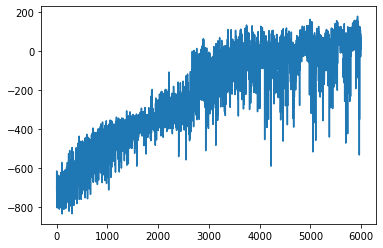

In [19]:
Qtable_OilF = initialize_q_table(state_space, action_space)
# Training parameters
n_training_episodes = 6000  # Total training episodes
learning_rate = 0.05         # Learning rate

# Environment parameters
env_id = "OilF"     # Name of the environment
max_steps = 300               # Max steps per episode
gamma = 0.998              # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.2         # Minimum exploration probability 
decay_rate = 0.0005            # Exponential decay rate for exploration prob
Qtable_OilFN,mean_r,std_r,episode_rs2 = train_Q(int(n_training_episodes), min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_OilF,learning_rate,gamma)
visualize(mean_r,std_r,episode_rs2)

In [20]:
# Evaluate our Agent
mean_reward, std_reward= evaluate_agent(env, max_steps, 1, Qtable_OilFN)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Mean_reward=159.00 +/- 0.00


  0%|          | 0/2000 [00:00<?, ?it/s]

35.293 259.5300852521726


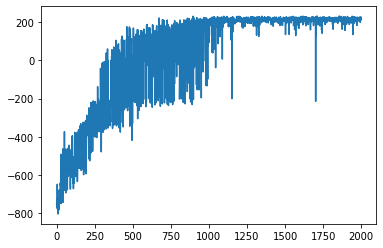

In [21]:
Qtable_OilF = initialize_q_table(state_space, action_space)
# Training parameters
n_training_episodes = 2000  # Total training episodes
learning_rate = 0.05       # Learning rate

# Environment parameters
env_id = "OilF"     # Name of the environment
max_steps = 300               # Max steps per episode
gamma = 0.9999              # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob
Qtable_OilFN,mean_r,std_r,episode_rs1 = train_SARSA(int(n_training_episodes), min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_OilF,learning_rate,gamma)
visualize(mean_r,std_r,episode_rs1)

In [22]:
# Evaluate our Agent
mean_reward, std_reward= evaluate_agent(env, max_steps, 1, Qtable_OilFN,True)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=231.00 +/- 0.00


  0%|          | 0/4000 [00:00<?, ?it/s]

-246.75825 261.21548347473106


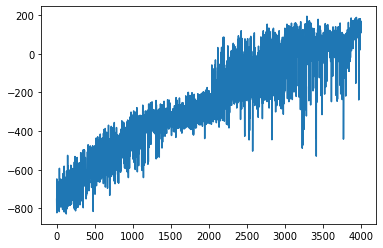

In [23]:
Qtable_OilF = initialize_q_table(state_space, action_space)
# Training parameters
n_training_episodes = 4000  # Total training episodes
learning_rate = 0.05        # Learning rate

# Environment parameters
env_id = "OilF"     # Name of the environment
max_steps = 300               # Max steps per episode
gamma = 0.9999              # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.0005            # Exponential decay rate for exploration prob
Qtable_OilFN,mean_r,std_r,episode_rs1 = train_SQ(int(n_training_episodes), min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_OilF,learning_rate,gamma)
visualize(mean_r,std_r,episode_rs1)

In [24]:
# Evaluate our Agent
mean_reward, std_reward= evaluate_agent(env, max_steps, 1, Qtable_OilFN)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Mean_reward=231.00 +/- 0.00


In [25]:
def train_SARSA_soft(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable,learning_rate,gamma,temp):
  episode_rewards=[]
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    prob_t = [0]* len(env.actions)
    action1 = softmax_policy(Qtable,state,env,prob_t,temp)
    total_rewards_ep=0
    # repeat
    for step in range(max_steps):
      new_state, reward, done, info = env.step(action1)
      # Choose the action At using epsilon greedy policy
      action2 = softmax_policy(Qtable,state,env,prob_t,temp)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      

      # Update Q(s,a)
      Qtable[state, action1] = Qtable[state, action1] + learning_rate * (reward + gamma * Qtable[new_state, action2] - Qtable[state, action1])

      total_rewards_ep += reward
      # If done, finish the episode
      if done:
        break
      
      # Our state is the new state
      state = new_state
      action1 = action2
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)
  return Qtable,mean_reward,std_reward,episode_rewards

  0%|          | 0/6000 [00:00<?, ?it/s]

-841.0956666666667 78.03280409260938


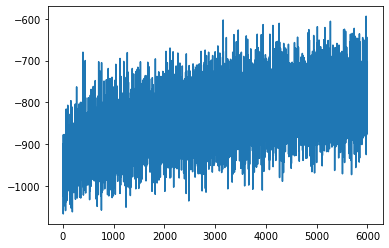

In [26]:
Qtable_OilF = initialize_q_table(state_space, action_space)
# Training parameters
n_training_episodes = 6000  # Total training episodes
learning_rate = 0.001   # Learning rate

# Environment parameters
env_id = "OilF"     # Name of the environment
max_steps = 400               # Max steps per episode
gamma = 0.9999              # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.01          # Exponential decay rate for exploration prob
Qtable_OilFN,mean_r,std_r,episode_rs1 = train_SARSA_soft(int(n_training_episodes), min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_OilF,learning_rate,gamma,5)
visualize(mean_r,std_r,episode_rs1)

In [27]:
# Evaluate our Agent
mean_reward, std_reward= evaluate_agent(env, max_steps, 1, Qtable_OilFN)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Mean_reward=-691.00 +/- 0.00


In [28]:
def train_Q_soft(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable,learning_rate,gamma,temp):
  episode_rewards=[]
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    prob_t = [0]* len(env.actions)
    total_rewards_ep=0

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = softmax_policy(Qtable,state,env,prob_t,temp)
      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, done, info = env.step(action)
      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])   
      # If done, finish the episode
      total_rewards_ep += reward
      if done:
        break
      
      # Our state is the new state
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)
    
  return Qtable,mean_reward,std_reward,episode_rewards

  0%|          | 0/6000 [00:00<?, ?it/s]

-673.9461666666666 117.11752901240797


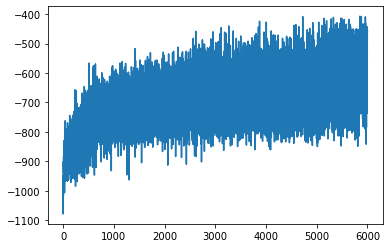

In [29]:
Qtable_OilF = initialize_q_table(state_space, action_space)
# Training parameters
n_training_episodes = 6000  # Total training episodes
learning_rate = 0.001   # Learning rate

# Environment parameters
env_id = "OilF"     # Name of the environment
max_steps = 400               # Max steps per episode
gamma = 0.9999              # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05           # Minimum exploration probability 
decay_rate = 0.005        # Exponential decay rate for exploration prob
Qtable_OilFN,mean_r,std_r,episode_rs1 = train_Q_soft(int(n_training_episodes), min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_OilF,learning_rate,gamma,0.85)
visualize(mean_r,std_r,episode_rs1)

In [30]:
# Evaluate our Agent
mean_reward, std_reward= evaluate_agent(env, max_steps, 1, Qtable_OilFN)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

Mean_reward=-474.00 +/- 0.00
